# Introduction to spatial data analysis with geopandas

Now as we have learned how to create and represent geographic data in Python using `shapely` objects, we will continue and use [geopandas](https://geopandas.org/) [^geopandas] as our main tool for spatial data analysis. Geopandas extends the capacities of pandas (which we covered in the Part I of the book) with geospatial operations. The main data structures in geopandas are `GeoSeries` and `GeoDataFrame` which extend the capabilities of `Series` and `DataFrames` from pandas. This means that we can use many familiar methods from pandas also when working with geopandas and spatial features. A `GeoDataFrame` is basically a `pandas.DataFrame` that contains one column for geometries. The geometry column is a `GeoSeries` which contains the geometries  as `shapely` objects (points, lines, polygons, multipolygons etc.). 

## Getting started with geopandas

![_**Figure 6.10**. Geometry column in a GeoDataFrame._](../img/geodataframe.png)

_**Figure 6.10**. Geometry column in a GeoDataFrame._

Similar to importing import pandas as `pd`, we will import geopandas as `gpd`:

In [1]:
import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In [2]:
import geopandas as gpd

## Reading a file

In `geopandas`, we can use a generic function `.from_file()` for reading in various data formats. The data-folder contains some census data from Austin, Texas downloaded from the [U.S Census bureau](https://www.census.gov/programs-surveys/acs/data.html) [^us_census]. Let's first define the path to the file.

In [3]:
from pathlib import Path

data_folder = Path("data")
fp = data_folder/ "Austin" / "austin_pop_2019.gpkg"
print(fp)

data/Austin/austin_pop_2019.gpkg


Now we can pass this filepath to `geopandas`.

In [4]:
data = gpd.read_file(fp)

Let's check the data type.

In [5]:
type(data)

geopandas.geodataframe.GeoDataFrame

Here we see that our `data` -variable is a `GeoDataFrame` which extends the functionalities of
`DataFrame` to handle spatial data. We can apply many familiar `pandas` methods to explore the contents of our `GeoDataFrame`. Let's have a closer look at the first rows of the data. 

In [6]:
data.head()

,pop2019,tract,geometry
0,6070.0,002422,"POLYGON ((615643.487 3338728.496, 615645.477 3..."
1,2203.0,001751,"POLYGON ((618576.586 3359381.053, 618614.330 3..."
2,7419.0,002411,"POLYGON ((619200.163 3341784.654, 619270.849 3..."
3,4229.0,000401,"POLYGON ((621623.757 3350508.165, 621656.294 3..."
4,4589.0,002313,"POLYGON ((621630.247 3345130.744, 621717.926 3..."


#### Question 6.2

Figure out the following information from our input data using your `pandas` skills:
    
- Number of rows?
- Number of census tracts (based on column `tract`)?
- Total population (based on column `pop2019`)?

In [7]:
# You can use this cell to enter your solution.

In [8]:
# Solution 

print("Number of rows", len(data))
print("Number of census tract", data["tract"].nunique())
print("Total population", data["pop2019"].sum())

Number of rows 130
Number of census tract 130
Total population 611935.0


It is always a good idea to explore your data also on a map. Creating a simple map from a `GeoDataFrame` is really easy. You can use the ``.plot()`` -function from geopandas that creates a map based on the geometries of the data. `geopandas` actually uses `matplotlib` for plotting which we introduced in Part 1 of this book. Let's try it out, and do a quick visualization of our data.

<AxesSubplot: >

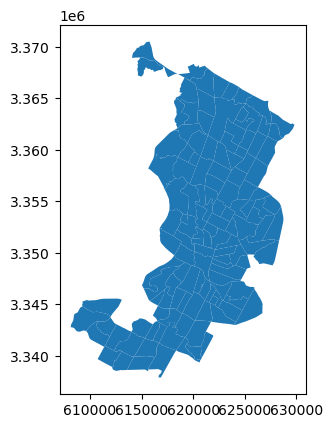

In [9]:
data.plot()

_**Figure 6.11**. Census tract polygons for Austin, Texas, USA._

Voilá! Now we have a quick overview of the geometries in this data. The x and y axes in the plot are based on the coordiante values of the geometries.

## Geometries in geopandas

A `GeoDataFrame` has one column for storing geometries. By default, `geopandas` looks for the geometries from a column called `geometry`. It is also possible to define other columns as the geometry column. Th geometry column is a `GeoSeries` that contains shapely's geometric objects.  Let's have a look at the geometry column of our sample data.

In [10]:
data["geometry"].head()

0    POLYGON ((615643.487 3338728.496, 615645.477 3...
1    POLYGON ((618576.586 3359381.053, 618614.330 3...
2    POLYGON ((619200.163 3341784.654, 619270.849 3...
3    POLYGON ((621623.757 3350508.165, 621656.294 3...
4    POLYGON ((621630.247 3345130.744, 621717.926 3...
Name: geometry, dtype: geometry

As we can see here,  the `geometry` column contains polygon geometries. Since these polygons are  `shapely` objects, it is possible to use `shapely` methods for handling them also in `geopandas`. Many of the methods can be applied all at once to the whole `GeoDataFrame`. 

Let's proceed to calculating area of the census tract polygons. At this point, it is good to note that the census data are in a metric coordinate reference system, so the area values will be given in square meters.

In [11]:
data["geometry"].area

0      4.029772e+06
1      1.532030e+06
2      3.960344e+06
3      2.181762e+06
4      2.431208e+06
           ...     
125    2.321182e+06
126    4.388407e+06
127    1.702764e+06
128    3.540893e+06
129    2.054702e+06
Length: 130, dtype: float64

The same result can be achieved by using the syntax `data.area`. Let's convert the area values from square meters to square kilometers and store them into a new column.

In [12]:
# Get area and convert from m2 to km2
data["area_km2"] = data.area / 1000000

Check the output.

In [13]:
data["area_km2"].head()

0    4.029772
1    1.532030
2    3.960344
3    2.181762
4    2.431208
Name: area_km2, dtype: float64

#### Question 6.3

Using your `pandas` skills, create a new column `pop_density_km2` and populate it with population density values (population / km2) calculated based on columns `pop2019` and `area_km2`. Print out answers to the following questions:

- What was the average population density in 2019?
- What was the maximum population density per census tract?

In [14]:
# Use this cell to enter your solution.

In [15]:
# Solution 

# Calculate population density
data["pop_density_km2"] = data["pop2019"] / data["area_km2"]

# Print out average and maximum values
print("Average:", 
      round(data["pop_density_km2"].mean()), "pop/km2")

print("Maximum:", 
      round(data["pop_density_km2"].max()), "pop/km2")

Average: 2397 pop/km2
Maximum: 11324 pop/km2


## Writing data into a file

It is possible to export spatial data into various data formats using the `.to_file()` method in `geopandas`. Let's practice writing data into the geopackage file format. Before proceeding, let's check how the data looks like at this point.

In [16]:
data.head()

,pop2019,tract,geometry,area_km2,pop_density_km2
0,6070.0,002422,"POLYGON ((615643.487 3338728.496, 615645.477 3...",4.029772,1506.288769
1,2203.0,001751,"POLYGON ((618576.586 3359381.053, 618614.330 3...",1.532030,1437.961408
2,7419.0,002411,"POLYGON ((619200.163 3341784.654, 619270.849 3...",3.960344,1873.322183
3,4229.0,000401,"POLYGON ((621623.757 3350508.165, 621656.294 3...",2.181762,1938.341868
4,4589.0,002313,"POLYGON ((621630.247 3345130.744, 621717.926 3...",2.431208,1887.538655


Let's create a folder  (if it doens't exist) and file name for our result. We will use geopackage also as the output format. 

In [17]:
# Create a output path for the data
output_folder = Path("data/results")

if not output_folder.exists():
    output_folder.mkdir()

output_fp = output_folder / "austin_pop_density_2019.gpkg"

Write the data into a file using the `.to_file()` method.

In [18]:
data.to_file(output_fp)

#### Question 6.4

Read the output file using `geopandas` and check that the data looks ok.

In [19]:
# Use this cell to enter your solution.

In [20]:
# Solution

temp = gpd.read_file(output_fp)

# Check first rows
temp.head()

,pop2019,tract,area_km2,pop_density_km2,geometry
0,6070.0,002422,4.029772,1506.288769,"POLYGON ((615643.487 3338728.496, 615645.477 3..."
1,2203.0,001751,1.532030,1437.961408,"POLYGON ((618576.586 3359381.053, 618614.330 3..."
2,7419.0,002411,3.960344,1873.322183,"POLYGON ((619200.163 3341784.654, 619270.849 3..."
3,4229.0,000401,2.181762,1938.341868,"POLYGON ((621623.757 3350508.165, 621656.294 3..."
4,4589.0,002313,2.431208,1887.538655,"POLYGON ((621630.247 3345130.744, 621717.926 3..."


<AxesSubplot: >

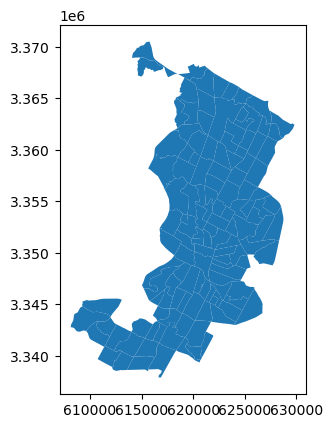

In [21]:
# Solution

# You can also plot the data for a visual check
temp.plot()

## Footnotes

[^geopandas]: <https://geopandas.org/>
[^NLS_topodata]: <https://www.maanmittauslaitos.fi/en/maps-and-spatial-data/expert-users/product-descriptions/topographic-database>
[^NLS_lisence]: <https://www.maanmittauslaitos.fi/en/opendata-licence-cc40>
[^OGC_sfa]: <https://www.ogc.org/standards/sfa>
[^paituli]: <https://avaa.tdata.fi/web/paituli/latauspalvelu>
[^topodata_fair]: <https://etsin.fairdata.fi/dataset/5023ecc7-914a-4494-9e32-d0a39d3b56ae>
[^us_census]: <https://www.census.gov/programs-surveys/acs/data.html>